In [2]:
import batman
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
params = batman.TransitParams()
params.t0 = 0.0
params.per = 10.0
params.rp = 0.1
params.a = 15.0
params.inc = 88.0
params.ecc = 0.05
params.w = 90.0
params.u = [0.1, 0.3]
params.limb_dark = "quadratic"

In [4]:
t = np.linspace(-0.5, 0.5, 100)
m = batman.TransitModel(params, t)
flux = m.light_curve(params)

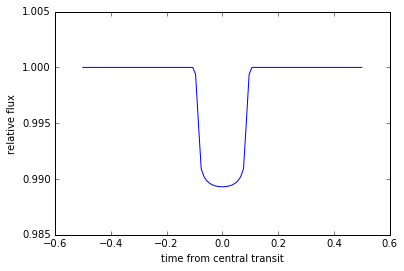

In [5]:
plt.plot(t, flux)
plt.xlabel("time from central transit")
plt.ylabel("relative flux")
plt.ylim(0.985, 1.005)
plt.show()

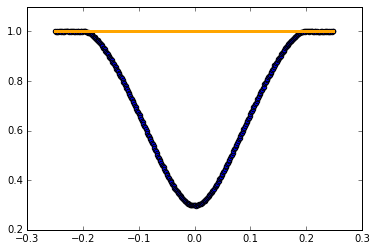

In [50]:
from simulate import simulate
times, noise = simulate()
m = batman.TransitModel(params, times)

# generate simulated data!
params.rp = 1.0
flux = m.light_curve(params)
simulateddata = flux*noise
plt.scatter(times, simulateddata)

data = np.array([times, simulateddata])

# generate some model
params.t0 = 1.0
model = m.light_curve(params)
plt.plot(times, model, color='orange', linewidth=3)

theory = np.array([times, model])

In [42]:
print np.shape(data)
print np.shape(theory)

(2, 360)
(2, 360)


In [24]:
np.append?

In [34]:
def chisqa (data, model):
    chi = 0
    
    for i in range(len(data)):
        num = (data[i]-model[i])**2
        denom = model[i]
        summ = num/denom
        chi = chi + summ
    chisum = np.sum(chi)
    return chisum
    

In [51]:
print chisqa (data, theory)

50.3124291712


In [52]:
import scipy.optimize as spicy

In [54]:
spicy?